--- Data Loading and Preprocessing ---
Dataset shape: (569, 30)
Target variable distribution:
1    0.627417
0    0.372583
Name: proportion, dtype: float64
Feature names: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

First 5 rows of features:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   

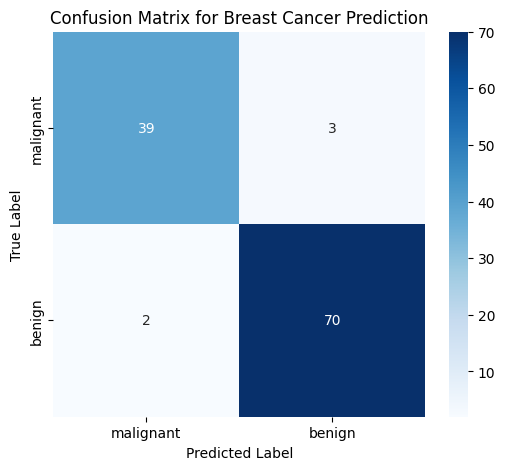

In [1]:
# Task 3: Predictive Analytics for Resource Allocation
# Goal: Predict Breast Cancer Diagnosis (Benign/Malignant)

# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Data Loading and Preprocessing ---")

# 1. Load the Dataset
# The Breast Cancer dataset is conveniently available in scikit-learn
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target) # 0 for malignant, 1 for benign

# Display basic info
print(f"Dataset shape: {X.shape}")
print(f"Target variable distribution:\n{y.value_counts(normalize=True)}")
print(f"Feature names: {X.columns.tolist()}")
print("\nFirst 5 rows of features:")
print(X.head())
print("\nTarget mapping: 0 = malignant, 1 = benign")

# 2. Data Preprocessing
# The scikit-learn breast cancer dataset is relatively clean.
# We will perform feature scaling, which is generally good practice for many ML models.
# Although Random Forest is less sensitive to scaling, it's good for consistency.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=data.feature_names) # Convert back to DataFrame for consistency

print("\n--- Data Splitting ---")

# 3. Split Data (Training and Testing Sets)
# We'll split the data into 80% training and 20% testing.
# stratify=y ensures that the proportion of target classes is the same in both train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training target distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Testing target distribution:\n{y_test.value_counts(normalize=True)}")

print("\n--- Model Training ---")

# 4. Train a Model (Random Forest Classifier)
# Random Forest is an ensemble learning method suitable for classification.
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Random Forest model trained successfully.")

print("\n--- Model Evaluation ---")

# 5. Evaluate Performance Metrics
y_pred = model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate F1-score
# F1-score is useful for imbalanced datasets and balances precision and recall.
# 'weighted' is good when dealing with multiclass or slightly imbalanced binary.
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score (weighted): {f1:.4f}")

# Display Classification Report for more detailed metrics (Precision, Recall, F1-score per class)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Display Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Optional: Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Breast Cancer Prediction')
plt.show()

# Interpretation of Results:
# Accuracy: Proportion of correctly classified instances.
# F1-score: Harmonic mean of precision and recall. Higher is better.
# Classification Report: Provides precision, recall, f1-score, and support for each class (malignant, benign).
# Confusion Matrix:
#   Top-left: True Negatives (correctly predicted malignant)
#   Top-right: False Positives (predicted benign, but actually malignant)
#   Bottom-left: False Negatives (predicted malignant, but actually benign)
#   Bottom-right: True Positives (correctly predicted benign)